In [1]:
# Install necessary packages if not already installed
!pip install numpy opencv-python
!pip install dlib
!pip install face_recognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=3cf43b74d9e8edc38f42ce33ffad520ccbc02aa27a08c7409e07867affeeb5ee
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
# create folder for training and testing data
!mkdir train
!mkdir test

In [3]:
#Import the necessary libraries
import face_recognition as fr
import cv2

import numpy as np
import os

In [29]:
# Path to the directory containing training images
path = "./train/"

# Initialize lists to store known names and their encodings
known_names = []
known_name_encodings = []

# Retrieve a list of image files in the specified directory
images = os.listdir(path)

In [30]:
# Loop through each image file
for _ in images:
  # Check if the item is a file (not a directory)
    if os.path.isfile(path + _):
      # Load the image using face_recognition library
        image = fr.load_image_file(path + _)
        image_path = path + _

        # Encode the face in the image
        encoding = fr.face_encodings(image)[0]

        # Append the encoding and corresponding name to the lists

        known_name_encodings.append(encoding)
        known_names.append(os.path.splitext(os.path.basename(image_path))[0].capitalize())

# Print the list of known names
print(known_names)

['Andrew04', 'Emma14', 'Emma02', 'Aidan07', 'Andrew06', 'Emma03', 'Aidan06', 'Aidan02', 'Aidan04', 'Aidan13', 'Andrew07', 'Aidan01', 'Emma11', 'Emma05', 'Aidan11', 'Emma15', 'Andrew13', 'Emma04', 'Andrew08', 'Andrew03', 'Emma07', 'Aidan15', 'Emma08', 'Andrew14', 'Aidan10', 'Aidan09', 'Aidan03', 'Andrew10', 'Emma10', 'Andrew01', 'Emma13', 'Emma09', 'Andrew15', 'Andrew11', 'Andrew12', 'Aidan08', 'Andrew02', 'Aidan12', 'Aidan14', 'Andrew05', 'Emma01']


In [22]:
# Path to the test image
test_image = "./test/test1.jpg"
# Load the image using OpenCV
image = cv2.imread(test_image)

# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [23]:
# Detect face locations and encodings in the test image
face_locations = fr.face_locations(image)
face_encodings = fr.face_encodings(image, face_locations)


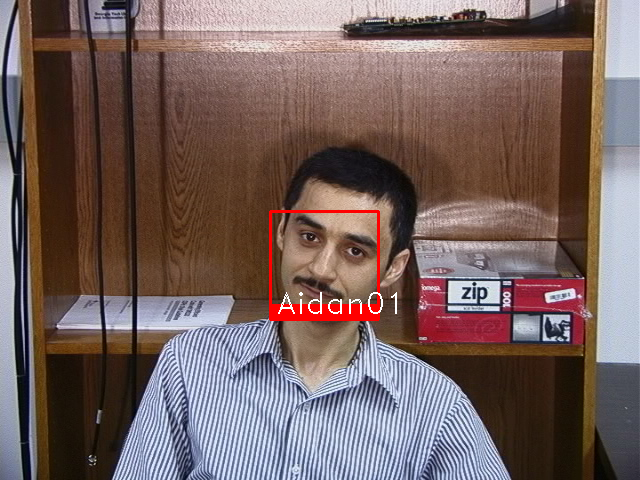

In [25]:
# below code cell is only be used in google colab as it is having patching problems with cv imshow
from google.colab.patches import cv2_imshow # (ignore it if using jypter notebook)

# Define a default name for unrecognized faces
default_name = "Unknown"

# Loop through each detected face and compare it with known encodings
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = fr.compare_faces(known_name_encodings, face_encoding)
    name = ""

    # Calculate face distances to find the best match
    face_distances = fr.face_distance(known_name_encodings, face_encoding)
    best_match = np.argmin(face_distances)

   # If a match is found, assign the name associated with the best match
    if matches[best_match]:
        name = known_names[best_match]

   # Draw rectangles around the detected faces and display the name
    cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)
    cv2.rectangle(image, (left, bottom - 15), (right, bottom), (0, 0, 255), cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(image, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

  # Display the annotated image
    cv2_imshow(image)

# Save the annotated image
cv2.imwrite("./output.jpg", image)

# Wait for a key press and close all OpenCV windows
cv2.waitKey(0)
cv2.destroyAllWindows()

The codes above is referred from: https://data-flair.training/blogs/python-face-recognition/

#Test 2

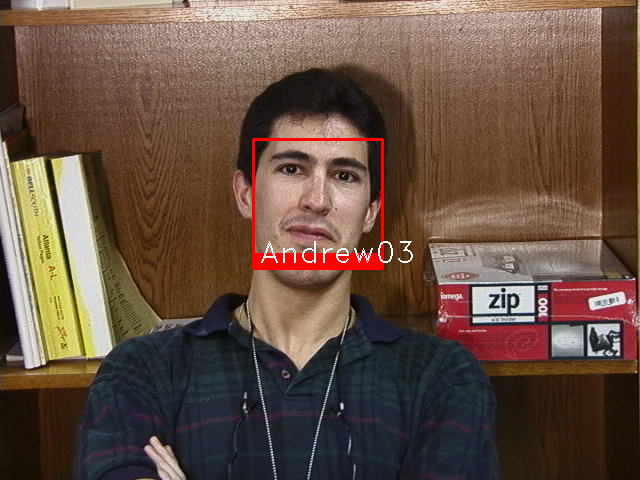

In [26]:
# Path to the test image
test_image = "./test/test2.jpg"
# Load the image using OpenCV
image = cv2.imread(test_image)

# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detect face locations and encodings in the test image
face_locations = fr.face_locations(image)
face_encodings = fr.face_encodings(image, face_locations)

# below code cell is only be used in google colab as it is having patching problems with cv imshow
from google.colab.patches import cv2_imshow # (ignore it if using jypter notebook)

# Define a default name for unrecognized faces
default_name = "Unknown"

# Loop through each detected face
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = fr.compare_faces(known_name_encodings, face_encoding)
    name = default_name  # Default name if no match is found

    face_distances = fr.face_distance(known_name_encodings, face_encoding)
    best_match = np.argmin(face_distances)

    # If a match is found, assign the name associated with the best match
    if matches[best_match]:
        name = known_names[best_match]

    cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)
    cv2.rectangle(image, (left, bottom - 15), (right, bottom), (0, 0, 255), cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(image, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the annotated image
    cv2_imshow(image)


#Test 3

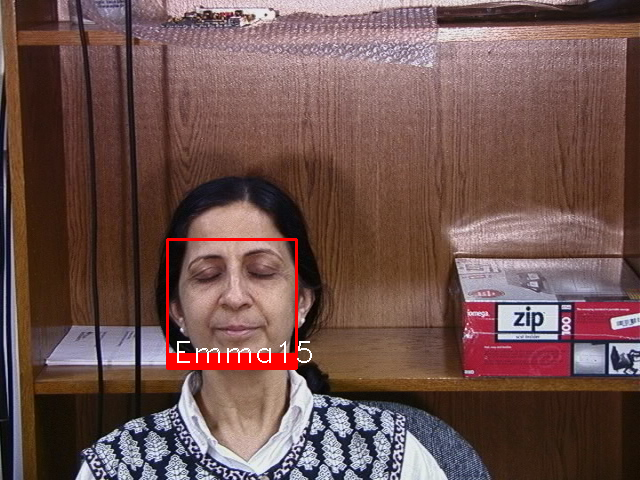

In [31]:
# Path to the test image
test_image = "./test/test3.jpg"
# Load the image using OpenCV
image = cv2.imread(test_image)

# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detect face locations and encodings in the test image
face_locations = fr.face_locations(image)
face_encodings = fr.face_encodings(image, face_locations)

# below code cell is only be used in google colab as it is having patching problems with cv imshow
from google.colab.patches import cv2_imshow # (ignore it if using jypter notebook)

# Define a default name for unrecognized faces
default_name = "Unknown"

# Loop through each detected face
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = fr.compare_faces(known_name_encodings, face_encoding)
    name = default_name  # Default name if no match is found

    face_distances = fr.face_distance(known_name_encodings, face_encoding)
    best_match = np.argmin(face_distances)

    # If a match is found, assign the name associated with the best match
    if matches[best_match]:
        name = known_names[best_match]

    cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)
    cv2.rectangle(image, (left, bottom - 15), (right, bottom), (0, 0, 255), cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(image, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the annotated image
    cv2_imshow(image)


# Test 4: Below is the result when the person is not present in database

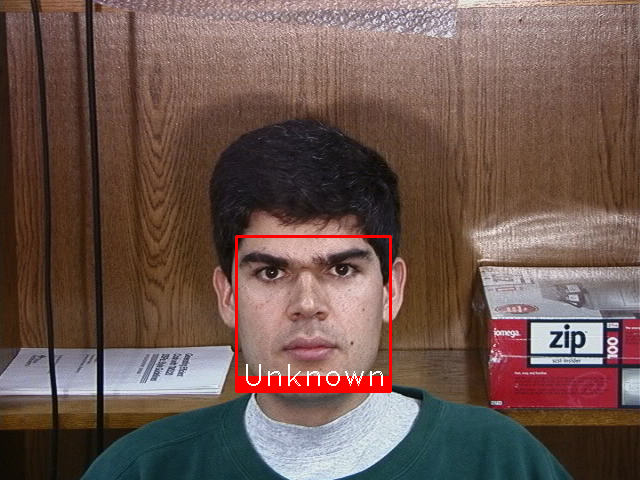

In [28]:
# Path to the test image
test_image = "./test/test4.jpg"
# Load the image using OpenCV
image = cv2.imread(test_image)

# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detect face locations and encodings in the test image
face_locations = fr.face_locations(image)
face_encodings = fr.face_encodings(image, face_locations)

# below code cell is only be used in google colab as it is having patching problems with cv imshow
from google.colab.patches import cv2_imshow # (ignore it if using jypter notebook)

# Define a default name for unrecognized faces
default_name = "Unknown"

# Loop through each detected face
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = fr.compare_faces(known_name_encodings, face_encoding)
    name = default_name  # Default name if no match is found

    face_distances = fr.face_distance(known_name_encodings, face_encoding)
    best_match = np.argmin(face_distances)

    # If a match is found, assign the name associated with the best match
    if matches[best_match]:
        name = known_names[best_match]

    cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)
    cv2.rectangle(image, (left, bottom - 15), (right, bottom), (0, 0, 255), cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(image, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the annotated image
    cv2_imshow(image)
